In [7]:
import pandas as pd
import sqlalchemy

In [8]:
# Настройка параметров подключения к вашей базе данных
connection_params = {
    'dbname': 'mimic',
    'user': 'postgres',
    'host': 'localhost',
    'port': '5432'
}

In [3]:
# SQL-запрос

query = """
SELECT 
  drg.subject_id,
  patients.anchor_age AS age,
  patients.gender AS sex,
  drg.hadm_id,
  drg.drg_code,
  drg.description,
  ferritin.valuenum AS ferritin,
  ferrum.valuenum AS ferrum,
  haemoglobin.valuenum AS haemoglobin,
  platelets.valuenum AS platelets,
  triage.chiefcomplaint -- добавляем chiefcomplaint из таблицы triage
FROM 
  drgcodes drg
LEFT JOIN patients ON drg.subject_id = patients.subject_id
LEFT JOIN (
  SELECT
    ll.subject_id,
    CAST(ll.hadm_id AS integer) AS hadm_id,
    ll.itemid,
    ll.valuenum,
    ll.charttime
  FROM labevents ll
  INNER JOIN
    (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
    FROM labevents
    GROUP BY subject_id, hadm_id, itemid) lg
    ON ll.subject_id = lg.subject_id
    AND ll.hadm_id = lg.hadm_id
    AND ll.itemid = lg.itemid
    AND ll.charttime = lg.mindate
  WHERE
    ll.itemid = 50924
) ferritin ON drg.subject_id = ferritin.subject_id AND drg.hadm_id = ferritin.hadm_id
LEFT JOIN (
  SELECT
    ll.subject_id,
    CAST(ll.hadm_id AS integer) AS hadm_id,
    ll.itemid,
    ll.valuenum,
    ll.charttime
  FROM labevents ll
  INNER JOIN
    (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
    FROM labevents
    GROUP BY subject_id, hadm_id, itemid) lg
    ON ll.subject_id = lg.subject_id
    AND ll.hadm_id = lg.hadm_id
    AND ll.itemid = lg.itemid
    AND ll.charttime = lg.mindate
  WHERE
    ll.itemid = 50952
) ferrum ON drg.subject_id = ferrum.subject_id AND drg.hadm_id = ferrum.hadm_id
LEFT JOIN (
  SELECT
    ll.subject_id,
    CAST(ll.hadm_id AS integer) AS hadm_id,
    ll.itemid,
    ll.valuenum,
    ll.charttime
  FROM labevents ll
  INNER JOIN
    (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
    FROM labevents
    GROUP BY subject_id, hadm_id, itemid) lg
    ON ll.subject_id = lg.subject_id
    AND ll.hadm_id = lg.hadm_id
    AND ll.itemid = lg.itemid
    AND ll.charttime = lg.mindate
  WHERE
    ll.itemid = 50811
) haemoglobin ON drg.subject_id = haemoglobin.subject_id AND drg.hadm_id = haemoglobin.hadm_id
LEFT JOIN (
  SELECT
    ll.subject_id,
    CAST(ll.hadm_id AS integer) AS hadm_id,
    ll.itemid,
    ll.valuenum,
    ll.charttime
  FROM labevents ll
  INNER JOIN
    (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
    FROM labevents
    GROUP BY subject_id, hadm_id, itemid) lg
    ON ll.subject_id = lg.subject_id
    AND ll.hadm_id = lg.hadm_id
    AND ll.itemid = lg.itemid
    AND ll.charttime = lg.mindate
  WHERE
    ll.itemid = 51265
) platelets ON drg.subject_id = platelets.subject_id AND drg.hadm_id = platelets.hadm_id
LEFT JOIN triage triage ON drg.subject_id = triage.subject_id -- соединяем только по subject_id
WHERE 
  drg.drg_code IN (374, 375, 376)
ORDER BY 
  drg.subject_id, drg.hadm_id;
"""

# query = """
# SELECT 
#   drg.subject_id,
#   patients.anchor_age AS age,
#   patients.gender AS sex,
#   drg.hadm_id,
#   drg.drg_code,
#   drg.description,
#   ferritin.valuenum AS ferritin,
#   ferrum.valuenum AS ferrum,
#   haemoglobin.valuenum AS haemoglobin,
#   platelets.valuenum AS platelets,
#   triage.chiefcomplaint
# FROM 
#   drgcodes drg
# LEFT JOIN patients ON drg.subject_id = patients.subject_id
# LEFT JOIN (
#   SELECT
#     ll.subject_id,
#     CAST(ll.hadm_id AS integer) AS hadm_id,
#     ll.itemid,
#     ll.valuenum,
#     ll.charttime
#   FROM labevents ll
#   INNER JOIN
#     (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
#     FROM labevents
#     GROUP BY subject_id, hadm_id, itemid) lg
#     ON ll.subject_id = lg.subject_id
#     AND ll.hadm_id = lg.hadm_id
#     AND ll.itemid = lg.itemid
#     AND ll.charttime = lg.mindate
#   WHERE
#     ll.itemid = 50924
# ) ferritin ON drg.subject_id = ferritin.subject_id AND drg.hadm_id = ferritin.hadm_id
# LEFT JOIN (
#   SELECT
#     ll.subject_id,
#     CAST(ll.hadm_id AS integer) AS hadm_id,
#     ll.itemid,
#     ll.valuenum,
#     ll.charttime
#   FROM labevents ll
#   INNER JOIN
#     (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
#     FROM labevents
#     GROUP BY subject_id, hadm_id, itemid) lg
#     ON ll.subject_id = lg.subject_id
#     AND ll.hadm_id = lg.hadm_id
#     AND ll.itemid = lg.itemid
#     AND ll.charttime = lg.mindate
#   WHERE
#     ll.itemid = 50952
# ) ferrum ON drg.subject_id = ferrum.subject_id AND drg.hadm_id = ferrum.hadm_id
# LEFT JOIN (
#   SELECT
#     ll.subject_id,
#     CAST(ll.hadm_id AS integer) AS hadm_id,
#     ll.itemid,
#     ll.valuenum,
#     ll.charttime
#   FROM labevents ll
#   INNER JOIN
#     (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
#     FROM labevents
#     GROUP BY subject_id, hadm_id, itemid) lg
#     ON ll.subject_id = lg.subject_id
#     AND ll.hadm_id = lg.hadm_id
#     AND ll.itemid = lg.itemid
#     AND ll.charttime = lg.mindate
#   WHERE
#     ll.itemid = 50811
# ) haemoglobin ON drg.subject_id = haemoglobin.subject_id AND drg.hadm_id = haemoglobin.hadm_id
# LEFT JOIN (
#   SELECT
#     ll.subject_id,
#     CAST(ll.hadm_id AS integer) AS hadm_id,
#     ll.itemid,
#     ll.valuenum,
#     ll.charttime
#   FROM labevents ll
#   INNER JOIN
#     (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
#     FROM labevents
#     GROUP BY subject_id, hadm_id, itemid) lg
#     ON ll.subject_id = lg.subject_id
#     AND ll.hadm_id = lg.hadm_id
#     AND ll.itemid = lg.itemid
#     AND ll.charttime = lg.mindate
#   WHERE
#     ll.itemid = 51265
# ) platelets ON drg.subject_id = platelets.subject_id AND drg.hadm_id = platelets.hadm_id
# LEFT JOIN (
#   SELECT 
#     t.subject_id,
#     t.stay_id,
#     i.hadm_id,
#     t.chiefcomplaint
#   FROM 
#     triage t
#   INNER JOIN 
#     icustays i ON t.subject_id = i.subject_id::integer AND t.stay_id = i.stay_id
# ) triage ON drg.subject_id = triage.subject_id AND drg.hadm_id = triage.hadm_id -- соединяем по subject_id и hadm_id
# WHERE 
#   drg.drg_code IN (374, 375, 376)
# ORDER BY 
#   drg.subject_id, drg.hadm_id;
# """

In [9]:
uri = f"postgresql://{connection_params['user']}@{connection_params['host']}:{connection_params['port']}/{connection_params['dbname']}"
engine = sqlalchemy.create_engine(uri)

In [5]:
df = pd.read_sql(query, con=engine);

In [6]:
df

,subject_id,age,sex,hadm_id,drg_code,description,ferritin,ferrum,haemoglobin,platelets,chiefcomplaint
0,10001919,59,M,29897682,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,228.0,R Arm swelling
1,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,ELEVATED INR
2,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,"Tachycardia, Hypoxia"
3,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,Rectal pain
4,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,"Hematuria, Dysuria"
...,...,...,...,...,...,...,...,...,...,...,...
4043,19963394,63,M,26228172,374,DIGESTIVE MALIGNANCY W MCC,810.0,10.0,NaN,626.0,None
4044,19965443,91,F,27874810,374,DIGESTIVE MALIGNANCY W MCC,44.0,132.0,NaN,340.0,None
4045,19974576,75,F,24449283,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,645.0,Fever
4046,19974576,75,F,24449283,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,645.0,"Abd pain, Vomiting"


In [7]:
# Сохранение DataFrame в файл CSV
df.to_csv('selected_data_crc.csv', index=False)  # index=False исключает сохранение индекса

In [8]:
df.head(10)

,subject_id,age,sex,hadm_id,drg_code,description,ferritin,ferrum,haemoglobin,platelets,chiefcomplaint
0,10001919,59,M,29897682,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,228.0,R Arm swelling
1,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,ELEVATED INR
2,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,"Tachycardia, Hypoxia"
3,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,Rectal pain
4,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,"Hematuria, Dysuria"
5,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,Altered mental status
6,10003400,72,F,29483621,374,DIGESTIVE MALIGNANCY W MCC,423.0,35.0,NaN,111.0,ELEVATED INR
7,10003400,72,F,29483621,374,DIGESTIVE MALIGNANCY W MCC,423.0,35.0,NaN,111.0,"Tachycardia, Hypoxia"
8,10003400,72,F,29483621,374,DIGESTIVE MALIGNANCY W MCC,423.0,35.0,NaN,111.0,Rectal pain
9,10003400,72,F,29483621,374,DIGESTIVE MALIGNANCY W MCC,423.0,35.0,NaN,111.0,"Hematuria, Dysuria"


In [208]:
import pandas as pd

# Читаем данные из CSV файла
data_complaints = pd.read_csv('full_data_ready_for_model_v.2.csv')

# Функция для очистки значений в столбце chiefcomplaint
def clean_complaint(complaint):
    if pd.isna(complaint) or complaint == '':
        return None  # Возвращаем пустой список вместо NaN или пустой строки

    # Разделяем строку на слова, убираем лишние пробелы
    words = [word.strip() for word in complaint.split(',')]
    
    # Удаляем дубликаты и слова, содержащие '/'
    comp = []
    for word in words:
        if word != 'nan' and '/' not in word:
            comp.append(word)
    # Возвращаем список уникальных слов
    return list(set(comp))  # Используем set для удаления дубликатов

# Применяем функцию к столбцу chiefcomplaint
data_complaints['chiefcomplaint'] = data_complaints['chiefcomplaint'].apply(clean_complaint)

# Выводим результат
data_complaints

,hadm_id,subject_id,age,sex,drg_code,description,ferritin,ferrum,haemoglobin,platelets,chiefcomplaint,ds
0,20001461,16725940,54,F,375,DIGESTIVE MALIGNANCY W CC,198.0,29.0,NaN,56.0,"[vomiting, abd pain, weakness, pain]",True
1,20002270,18346781,46,M,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,174.0,None,True
2,20022678,16326503,74,M,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,272.0,"[abd pain, syncope, vomiting, gtube eval, weak...",True
3,20079028,11796849,77,F,375,DIGESTIVE MALIGNANCY W CC,403.0,11.0,NaN,368.0,"[fever, brbpr]",True
4,20083205,10995547,69,M,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,162.0,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...
16893,29997523,16012077,47,F,331,MAJOR SMALL & LARGE BOWEL PROCEDURES W/O CC/MCC,NaN,NaN,NaN,422.0,"[ruq abdominal pain, transfer]",False
16894,29998079,16957952,70,F,543,PATHOLOGICAL FRACTURES & MUSCULOSKELET & CONN ...,NaN,NaN,NaN,83.0,[],False
16895,29998421,18183364,65,M,115,"OTHER EAR, NOSE, MOUTH,THROAT & CRANIAL/FACIAL...",NaN,NaN,NaN,172.0,[epistaxis],False
16896,29998779,11163466,35,M,894,HIV W ONE SIGNIF HIV COND OR W/O SIGNIF RELATE...,NaN,NaN,NaN,130.0,[abd pain],False


In [10]:
# # Получаем все значения из столбца chiefcomplaint, убираем NaN значения, приводим к нижнему регистру
# all_complaints = df['chiefcomplaint'].dropna().str.lower()

# # Разделяем значения по запятой и создаем список
# split_complaints = all_complaints.str.split(',').explode()

# # Убираем пробелы вокруг жалоб
# split_complaints = split_complaints.str.strip()

# # Подсчитываем количество вхождений каждого уникального значения
# complaint_counts = split_complaints.value_counts()

# # Сортируем значения по убыванию встречаемости
# sorted_complaint_counts = complaint_counts.sort_values(ascending=False)

# # Создаем список значений с частотой встречаемости
# frequency_list = [(complaint, count) for complaint, count in sorted_complaint_counts.items()]

# # Выводим результат
# for complaint, count in frequency_list:
#     print(f"{complaint}: {count}")


# # жалобы на основании которых можно заподозрить диагноз. выбраны по принципу:
# # "взяли то, что чаще всего встречались среди пациентов с диагнозом, и выкинули те, кто по опыту к лиагнозу никакого отношения не имеет"

# symptoms = ['abd pain',
#     'weakness',
#     "fever",
#     "dyspnea",
#     "vomiting",
#     "nausea",
#     "abdominal distention",
#     "diarrhea",
#     "dizziness",
#     "anemia",
#     "back pain",
#     "constipation",
#     "hypotension",
#     "lower back pain",
#     "melena",
#     "rlq abdominal pain",
#     "palpitations",
#     "abdominal pain",
#     "flank pain",
#     "fatigue",
#     "l flank pain",
#     "gi bleed",
#     "coffee ground emesis",
#     "pain",
#     "rectal pain",
#     "lower abdominal pain",
#     "bowel obstruction",
#     ]

In [11]:
# Добавление новой колонки 'true/false ds'- есть или нет искомый диагноз
df['ds'] = df['drg_code'].isin([374, 375, 376])

# Преобразование значений в True/False
df['ds'] = df['ds'].map({True: 'True', False: 'False'})

# Сохранение измененного DataFrame обратно в CSV
df.to_csv('selected_data_crc_tf.csv', index=False)

In [12]:
df

,subject_id,age,sex,hadm_id,drg_code,description,ferritin,ferrum,haemoglobin,platelets,chiefcomplaint,ds
0,10001919,59,M,29897682,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,228.0,R Arm swelling,True
1,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,ELEVATED INR,True
2,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,"Tachycardia, Hypoxia",True
3,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,Rectal pain,True
4,10003400,72,F,22390287,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,149.0,"Hematuria, Dysuria",True
...,...,...,...,...,...,...,...,...,...,...,...,...
4043,19963394,63,M,26228172,374,DIGESTIVE MALIGNANCY W MCC,810.0,10.0,NaN,626.0,None,True
4044,19965443,91,F,27874810,374,DIGESTIVE MALIGNANCY W MCC,44.0,132.0,NaN,340.0,None,True
4045,19974576,75,F,24449283,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,645.0,Fever,True
4046,19974576,75,F,24449283,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,645.0,"Abd pain, Vomiting",True


In [10]:
# отбираю 19000 пациентов без диагноза крр с такими же характеристиками для того,
# чтобы "разбавить" текущую выборку и модель могла осуществить предсказание.

query_not_in = """
SELECT 
  drg.subject_id,
  patients.anchor_age AS age,
  patients.gender AS sex,
  drg.hadm_id,
  drg.drg_code,
  drg.description,
  ferritin.valuenum AS ferritin,
  ferrum.valuenum AS ferrum,
  haemoglobin.valuenum AS haemoglobin,
  platelets.valuenum AS platelets,
  triage.chiefcomplaint -- добавляем chiefcomplaint из таблицы triage
FROM 
  drgcodes drg
LEFT JOIN patients ON drg.subject_id = patients.subject_id
LEFT JOIN (
  SELECT
    ll.subject_id,
    CAST(ll.hadm_id AS integer) AS hadm_id,
    ll.itemid,
    ll.valuenum,
    ll.charttime
  FROM labevents ll
  INNER JOIN
    (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
    FROM labevents
    GROUP BY subject_id, hadm_id, itemid) lg
    ON ll.subject_id = lg.subject_id
    AND ll.hadm_id = lg.hadm_id
    AND ll.itemid = lg.itemid
    AND ll.charttime = lg.mindate
  WHERE
    ll.itemid = 50924
) ferritin ON drg.subject_id = ferritin.subject_id AND drg.hadm_id = ferritin.hadm_id
LEFT JOIN (
  SELECT
    ll.subject_id,
    CAST(ll.hadm_id AS integer) AS hadm_id,
    ll.itemid,
    ll.valuenum,
    ll.charttime
  FROM labevents ll
  INNER JOIN
    (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
    FROM labevents
    GROUP BY subject_id, hadm_id, itemid) lg
    ON ll.subject_id = lg.subject_id
    AND ll.hadm_id = lg.hadm_id
    AND ll.itemid = lg.itemid
    AND ll.charttime = lg.mindate
  WHERE
    ll.itemid = 50952
) ferrum ON drg.subject_id = ferrum.subject_id AND drg.hadm_id = ferrum.hadm_id
LEFT JOIN (
  SELECT
    ll.subject_id,
    CAST(ll.hadm_id AS integer) AS hadm_id,
    ll.itemid,
    ll.valuenum,
    ll.charttime
  FROM labevents ll
  INNER JOIN
    (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
    FROM labevents
    GROUP BY subject_id, hadm_id, itemid) lg
    ON ll.subject_id = lg.subject_id
    AND ll.hadm_id = lg.hadm_id
    AND ll.itemid = lg.itemid
    AND ll.charttime = lg.mindate
  WHERE
    ll.itemid = 50811
) haemoglobin ON drg.subject_id = haemoglobin.subject_id AND drg.hadm_id = haemoglobin.hadm_id
LEFT JOIN (
  SELECT
    ll.subject_id,
    CAST(ll.hadm_id AS integer) AS hadm_id,
    ll.itemid,
    ll.valuenum,
    ll.charttime
  FROM labevents ll
  INNER JOIN
    (SELECT subject_id, hadm_id, itemid, MIN(charttime) AS mindate
    FROM labevents
    GROUP BY subject_id, hadm_id, itemid) lg
    ON ll.subject_id = lg.subject_id
    AND ll.hadm_id = lg.hadm_id
    AND ll.itemid = lg.itemid
    AND ll.charttime = lg.mindate
  WHERE
    ll.itemid = 51265
) platelets ON drg.subject_id = platelets.subject_id AND drg.hadm_id = platelets.hadm_id
LEFT JOIN triage triage ON drg.subject_id = triage.subject_id -- соединяем только по subject_id
WHERE 
  drg.drg_code NOT IN (374, 375, 376) -- изменено на NOT IN
ORDER BY 
  RANDOM() -- случайный порядок
LIMIT 19000; -- ограничение на 19000 записей
"""

In [11]:
df_not_in = pd.read_sql(query_not_in, con=engine);

In [12]:
# Сохранение DataFrame в файл CSV
df_not_in.to_csv('selected_data_not_crc.csv', index=False)  # index=False исключает сохранение индекса

In [13]:
# Добавление новой колонки 'true/false ds'- есть или нет искомый диагноз
df_not_in['ds'] = df_not_in['drg_code'].isin([374, 375, 376])

# Преобразование значений в True/False
df_not_in['ds'] = df_not_in['ds'].map({True: 'True', False: 'False'})

# Сохранение измененного DataFrame обратно в CSV
df_not_in.to_csv('selected_data_not_in_crc_tf.csv', index=False)

In [16]:
# Загрузка данных из CSV файла
df_not_in_concat = pd.read_csv('selected_data_not_in_crc_tf.csv')

# Определение функции для объединения уникальных значений
def unique_list(series):
    return ', '.join(map(str, series.unique()))  # Преобразуем в строки

# Группировка данных по hadm_id и применение функции к нужным столбцам
result_not_in_concat = df_not_in_concat.groupby('hadm_id').agg({
    'subject_id': unique_list,
    'age': unique_list,
    'sex': unique_list,
    'drg_code': unique_list,
    'description': unique_list,
    'ferritin': unique_list,
    'ferrum': unique_list,
    'haemoglobin': unique_list,
    'platelets': unique_list,
    'chiefcomplaint': unique_list,
    'ds': unique_list
}).reset_index()

# Сохранение результата в новый CSV файл
result_not_in_concat.to_csv('aggregated_data_not_in.csv', index=False)

print("Данные успешно агрегированы и сохранены в 'aggregated_data_not_in.csv'.")


Данные успешно агрегированы и сохранены в 'aggregated_data_not_in.csv'.


In [2]:
import pandas as pd

# Загрузка данных из CSV файла
df_concat = pd.read_csv('selected_data_crc_tf.csv')

# Определение функции для объединения уникальных значений
def unique_list(series):
    return ', '.join(map(str, series.unique()))  # Преобразуем в строки

# Группировка данных по hadm_id и применение функции к нужным столбцам
result_concat = df_concat.groupby('hadm_id').agg({
    'subject_id': unique_list,
    'age': unique_list,
    'sex': unique_list,
    'drg_code': unique_list,
    'description': unique_list,
    'ferritin': unique_list,
    'ferrum': unique_list,
    'haemoglobin': unique_list,
    'platelets': unique_list,
    'chiefcomplaint': unique_list,
    'ds': unique_list
}).reset_index()

# Сохранение результата в новый CSV файл
result_concat.to_csv('aggregated_data.csv', index=False)

print("Данные успешно агрегированы и сохранены в 'aggregated_data.csv'.")

Данные успешно агрегированы и сохранены в 'aggregated_data.csv'.


In [18]:
full_df = pd.concat([result_concat, result_not_in_concat], axis=0).reset_index(drop=True)

In [26]:
full_df

,hadm_id,subject_id,age,sex,drg_code,description,ferritin,ferrum,haemoglobin,platelets,chiefcomplaint,ds
0,20001461,16725940,54,F,375,DIGESTIVE MALIGNANCY W CC,198.0,29.0,nan,56.0,"Weakness, Abd pain, Weakness, Vomiting, Pain, ...",True
1,20002270,18346781,46,M,375,DIGESTIVE MALIGNANCY W CC,nan,nan,nan,174.0,nan,True
2,20022678,16326503,74,M,375,DIGESTIVE MALIGNANCY W CC,nan,nan,nan,272.0,"N/V, gtube eval, Vomiting, Weakness, ABD PAIN,...",True
3,20079028,11796849,77,F,375,DIGESTIVE MALIGNANCY W CC,403.0,11.0,nan,368.0,"FEVER, BRBPR",True
4,20083205,10995547,69,M,375,DIGESTIVE MALIGNANCY W CC,nan,nan,nan,162.0,nan,True
...,...,...,...,...,...,...,...,...,...,...,...,...
17887,29997523,16012077,47,F,331,MAJOR SMALL & LARGE BOWEL PROCEDURES W/O CC/MCC,nan,nan,nan,422.0,"RUQ abdominal pain, Transfer",False
17888,29998079,16957952,70,F,543,PATHOLOGICAL FRACTURES & MUSCULOSKELET & CONN ...,nan,nan,nan,83.0,R/O UTI,False
17889,29998421,18183364,65,M,115,"OTHER EAR, NOSE, MOUTH,THROAT & CRANIAL/FACIAL...",nan,nan,nan,172.0,Epistaxis,False
17890,29998779,11163466,35,M,894,HIV W ONE SIGNIF HIV COND OR W/O SIGNIF RELATE...,nan,nan,nan,130.0,Abd pain,False


In [39]:
# Список столбцов для проверки
columns_to_check = ['hadm_id', 'subject_id', 'age', 'sex', 'drg_code', 'ferritin', 'ferrum', 'haemoglobin', 'platelets']

# Значение, по которому будем фильтровать столбец ds
value_to_check = 'True'  # Замените на нужное значение, если нужно

# Проверка на наличие значений с запятыми и подсчет значений ds = value_to_check
for column in columns_to_check:
    count_commas = full_df[column].astype(str).str.contains(',').sum()
    if count_commas > 0:
        # Фильтрация строк, где текущий столбец содержит запятые
        filtered_df = full_df[full_df[column].astype(str).str.contains(',')]
        # Подсчет строк, где ds равно нужному значению
        count_ds_matching = (filtered_df['ds'] == value_to_check).sum()  # Сравнение с нужным значением
        print(f"В столбце '{column}' НАЙДЕНО {count_commas} значений с запятыми, из которых {count_ds_matching} имеют ds = {value_to_check}.")
    else:
        print(f"В столбце '{column}' нет значений с запятыми.")


В столбце 'hadm_id' нет значений с запятыми.
В столбце 'subject_id' нет значений с запятыми.
В столбце 'age' нет значений с запятыми.
В столбце 'sex' нет значений с запятыми.
В столбце 'drg_code' НАЙДЕНО 992 значений с запятыми, из которых 0 имеют ds = True.
В столбце 'ferritin' нет значений с запятыми.
В столбце 'ferrum' нет значений с запятыми.
В столбце 'haemoglobin' нет значений с запятыми.
В столбце 'platelets' НАЙДЕНО 3 значений с запятыми, из которых 0 имеют ds = True.


In [47]:
# Удаление строк, где в столбце 'drg_code' или 'platelets' есть значения с запятыми
filtered_df = full_df[~(full_df['drg_code'].astype(str).str.contains(',') | 
                         full_df['platelets'].astype(str).str.contains(','))]

# Если нужно, вы можете сохранить отфильтрованный DataFrame обратно в full_df
full_df = filtered_df

# Выводим количество оставшихся строк после удаления
print(f"Количество оставшихся строк после удаления: {len(full_df)}")


full_df['drg_code'] = full_df['drg_code'].astype(int)

print(full_df['drg_code'].dtype)  # Это должно вывести: int64



Количество оставшихся строк после удаления: 16898
int64


In [45]:
full_df.to_csv('full_data_ready_for_model.csv', index=False)

In [82]:
import pandas as pd

# Загрузка данных
full_df_2 = pd.read_csv('full_data_ready_for_model.csv')

# # Приведение значений в столбце 'chiefcomplaint' к нижнему регистру и разделение по запятой
# full_df_2['chiefcomplaint'] = full_df_2['chiefcomplaint'].astype(str).str.lower().str.split(',')

# # Удаление лишних пробелов в каждом элементе списка
# full_df_2['chiefcomplaint'] = full_df_2['chiefcomplaint'].apply(lambda x: [item.strip() for item in x])

# # Удаление дубликатов внутри списка
# full_df_2['chiefcomplaint'] = full_df_2['chiefcomplaint'].apply(lambda x: list(set(x)))

# # Проверка результата
# print(full_df_2['chiefcomplaint'].head())

# Шаг 1: Разделите строки на списки
full_df_2['chiefcomplaint'] = full_df_2['chiefcomplaint'].str.split(', ')

# Шаг 2: Используйте explode для создания отдельных строк
full_df_2_exploded = full_df_2.explode('chiefcomplaint')

# Теперь df_exploded будет выглядеть так:
print(full_df_2_exploded)


        hadm_id  subject_id  age sex  drg_code  \
0      20001461    16725940   54   F       375   
0      20001461    16725940   54   F       375   
0      20001461    16725940   54   F       375   
0      20001461    16725940   54   F       375   
0      20001461    16725940   54   F       375   
...         ...         ...  ...  ..       ...   
16893  29997523    16012077   47   F       331   
16894  29998079    16957952   70   F       543   
16895  29998421    18183364   65   M       115   
16896  29998779    11163466   35   M       894   
16897  29999572    16741612   50   M       813   

                                             description  ferritin  ferrum  \
0                              DIGESTIVE MALIGNANCY W CC     198.0    29.0   
0                              DIGESTIVE MALIGNANCY W CC     198.0    29.0   
0                              DIGESTIVE MALIGNANCY W CC     198.0    29.0   
0                              DIGESTIVE MALIGNANCY W CC     198.0    29.0   
0        

In [73]:
full_df_2.to_csv('full_data_ready_for_model_v.2.csv', index=False)

ПОПЫТКА №2 
тк в предыдущий заход получилась лажа

In [87]:
# снова объединяю датасеты в лоб

df1= pd.read_csv('selected_data_crc_tf.csv')

df2=pd.read_csv('selected_data_not_in_crc_tf.csv')

combined_df = pd.concat([df1, df2], ignore_index=True)

# Вывод результата
print(combined_df)

combined_df.info()

       subject_id  age sex   hadm_id  drg_code  \
0        10001919   59   M  29897682       375   
1        10003400   72   F  22390287       375   
2        10003400   72   F  22390287       375   
3        10003400   72   F  22390287       375   
4        10003400   72   F  22390287       375   
...           ...  ...  ..       ...       ...   
23043    18001923   68   M  21398842       253   
23044    10623984   60   M  28469693       775   
23045    11582633   49   F  20041918       291   
23046    19270999   33   M  29353090       755   
23047    13514894   68   F  25371981       512   

                                             description  ferritin  ferrum  \
0                              DIGESTIVE MALIGNANCY W CC       NaN     NaN   
1                              DIGESTIVE MALIGNANCY W CC       NaN     NaN   
2                              DIGESTIVE MALIGNANCY W CC       NaN     NaN   
3                              DIGESTIVE MALIGNANCY W CC       NaN     NaN   
4        

# BERT

In [211]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import DBSCAN
import numpy as np

In [212]:
# 1. Инициализация модели ClinicalBERT

tokenizer = AutoTokenizer.from_pretrained("medicalai/ClinicalBERT")
model = AutoModel.from_pretrained("medicalai/ClinicalBERT")

In [214]:
# 2. Получение эмбеддингов для столбца 'chiefcomplaint'
def get_embeddings(text):
    if isinstance(text, list):  # Проверяем, является ли текст списком
        text = ' '.join(text)  # Объединяем список строк в одну строку
    
    if not text:  # Проверяем, не является ли строка пустой
        return np.zeros((model.config.hidden_size,))  # Возвращаем вектор нулей, если строка пустая

    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Извлечение эмбеддингов из последнего скрытого слоя
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Применение функции к столбцу 'chiefcomplaint'
data_complaints['embeddings'] = data_complaints['chiefcomplaint'].apply(get_embeddings)

# 3. Подготовка эмбеддингов для кластеризации
embeddings = np.vstack(data_complaints['embeddings'].dropna().values)

In [218]:
filtered_df = data_complaints[(data_complaints['drg_code'] == 374) | 
                      (data_complaints['drg_code'] == 375) | 
                      (data_complaints['drg_code'] == 376)]


,hadm_id,subject_id,age,sex,drg_code,description,ferritin,ferrum,haemoglobin,platelets,chiefcomplaint,ds,embeddings,cluster
0,20001461,16725940,54,F,375,DIGESTIVE MALIGNANCY W CC,198.0,29.0,NaN,56.0,"[vomiting, abd pain, weakness, pain]",True,"[-0.19987145, -0.12340908, 1.0170431, 0.086864...",NaN
1,20002270,18346781,46,M,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,174.0,None,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
2,20022678,16326503,74,M,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,272.0,"[abd pain, syncope, vomiting, gtube eval, weak...",True,"[-0.16811824, -0.34274197, 0.7952956, -0.00861...",NaN
3,20079028,11796849,77,F,375,DIGESTIVE MALIGNANCY W CC,403.0,11.0,NaN,368.0,"[fever, brbpr]",True,"[0.16487554, 0.12508981, 0.67045236, -0.057862...",NaN
4,20083205,10995547,69,M,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,162.0,None,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,29954157,17083634,80,M,376,DIGESTIVE MALIGNANCY W/O CC/MCC,NaN,NaN,NaN,263.0,"[hypoglycemia, confusion]",True,"[-0.03947502, -0.47489288, 0.85223484, 0.20276...",NaN
1172,29959918,16870674,34,M,376,DIGESTIVE MALIGNANCY W/O CC/MCC,NaN,NaN,NaN,342.0,[abd pain],True,"[-0.002105701, -0.31941757, 0.6477048, 0.04658...",NaN
1173,29971278,19261620,74,F,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,223.0,None,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
1174,29993176,19993726,52,F,375,DIGESTIVE MALIGNANCY W CC,NaN,NaN,NaN,484.0,None,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN


In [238]:
data_complaints.to_csv('full_data_with_embeddings.csv', index=False)

In [232]:
# Получение эмбеддингов для анализа
embeddings_list = []

for index, row in filtered_df.iterrows():
    # Преобразование списка в строку, если это необходимо
    complaint_str = ' '.join(row['chiefcomplaint']) if isinstance(row['chiefcomplaint'], list) else row['chiefcomplaint']
    embeddings_list.append((row['drg_code'], complaint_str, row['embeddings']))

# Пример анализа: группировка по диагнозам и нахождение наиболее частых жалоб
from collections import defaultdict

complaints_by_diagnosis = defaultdict(list)

for diagnosis, complaint, embedding in embeddings_list:
    complaints_by_diagnosis[diagnosis].append(complaint)

# Вывод характерных жалоб для каждого кода DRG
for diagnosis, complaints in complaints_by_diagnosis.items():
    print(f"Код DRG {diagnosis}:")
    for complaint in set(complaints):
        print(f"- {complaint}")

Код DRG 375:
- 
- vomiting jaundice pancreas blockage n&v
- abd pain constipation +blood cultures left leg paresthesia lower back pain back pain weakness
- chf pulmonary embolus
- abd pain abdominal distention constipation
- wound eval pleural effusion pe transfer chest pain dyspnea
- wound eval abnormal labs right sided abdominal pain l leg cellulitis drain eval
- bilat le pain left arm swelling
- abd pain abdominal distention
- vomiting dysphasia dizziness epigastric pain
- abd pain sbo transfer constipation fever allergic reaction hematemesis
- neck pain l shoulder pain dizziness leg pain chest pain brbpr back pain l hip pain asthma exacerbation dyspnea
- gi bleeding
- abdominal distention hypotension right sided abdominal pain dyspnea on exertion dyspnea
- gi bleed changed mental status
- weakness dizziness
- abd pain dilodged g-tube abnormal labs melena clogged gtube tachycardia
- abd pain fever transfer sbo
- hematuria abd pain constipation nausea brbpr cough weakness for oncolog

In [236]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Применение KMeans для кластеризации
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)

# Преобразование эмбеддингов в 2D массив
embeddings_array = np.array(filtered_df['embeddings'].tolist())

# Обучение модели KMeans
kmeans.fit(embeddings_array)

# Установка меток кластеров в DataFrame
filtered_df['cluster'] = kmeans.labels_  # Здесь метки уже в нужной форме

# Проверка обновленного DataFrame
print(filtered_df)




# # Уменьшение размерности до 2 для визуализации
# pca = PCA(n_components=2)
# reduced_embeddings = pca.fit_transform(embeddings_array)

# # Визуализация кластеров
# plt.figure(figsize=(10, 6))
# for cluster in range(num_clusters):
#     plt.scatter(reduced_embeddings[filtered_df['cluster'] == cluster, 0], 
#                 reduced_embeddings[filtered_df['cluster'] == cluster, 1],
#                 label=f'Cluster {cluster}')

# plt.title('KMeans Clustering Visualization')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.legend()
# plt.grid()
# plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[2. 1. 2. ... 1. 1. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

# Понижение размерности с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# 2. Визуализация кластеров
plt.figure(figsize=(10, 7))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)

# 3. Добавление цветовой легенды
plt.colorbar(scatter, label='Cluster Label')
plt.title('DBSCAN Clustering of Chief Complaints')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [83]:
# Шаг 3: Фильтрация данных по drg_code

# filtered_df = full_df_2[(full_df_2['drg_code'] == 374) | 
#                       (full_df_2['drg_code'] == 375) | 
#                       (full_df_2['drg_code'] == 376)]

# # Шаг 4: Преобразование жалоб в векторы
# def get_vector(text):
#     inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=256)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     # Используем вектор CLS токена как представление текста
#     return outputs.last_hidden_state[:, 0, :].numpy()

# # Применяем функцию к колонке chiefcomplaint
# filtered_df['complaint_vector'] = filtered_df['chiefcomplaint'].apply(get_vector)

# filtered_df['complaint_vector']

# # Шаг 5: Найти общие жалобы
# common_complaints = filtered_df['chiefcomplaint'].value_counts()

# # Шаг 6: Форматированный вывод общих жалоб
# if not common_complaints.empty:
#     print("Общие жалобы для drg_code 374, 375, 376:")
#     for complaint, count in common_complaints.items():
#         print(f"- {complaint}: {count} раз(а)")
# else:
#     print("Нет общих жалоб для drg_code 374, 375, 376.")

import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

# Загрузка модели и токенизатора BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Применение BERT к каждому элементу
embeddings = []
for complaint in full_df_2_exploded['chiefcomplaint']:
    # Убедимся, что входные данные являются строкой
    if isinstance(complaint, str):
        inputs = tokenizer(complaint, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).numpy())
    else:
        # Обработаем случай, если значение не строка
        embeddings.append(None)  # Или любое другое значение по умолчанию

# Теперь переменная embeddings содержит векторы эмбеддингов для каждой строки


KeyboardInterrupt: 

In [ ]:
# Преобразуем список эмбеддингов в массив NumPy и удаляем None значения
embeddings = np.array([emb[0] for emb in embeddings if emb is not None])

# Кластеризация с использованием KMeans
n_clusters = len(full_df_2_exploded['drg_code'].unique())  # Количество уникальных drg_code
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(embeddings)

# Получаем метки кластеров
full_df_2_exploded['cluster'] = np.nan
full_df_2_exploded.loc[full_df_2_exploded['chiefcomplaint'].notnull(), 'cluster'] = kmeans.labels_

# Вывод результатов
print(full_df_2_exploded[['chiefcomplaint', 'drg_code', 'cluster']])

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


filtered_df = full_df_2[(full_df_2['drg_code'] == 374) | 
                      (full_df_2['drg_code'] == 375) | 
                      (full_df_2['drg_code'] == 376)]

# Векторизация текста с использованием TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(full_df_2_exploded['chiefcomplaint'])

# Применение DBSCAN
# Стандартизируем данные перед кластеризацией
X_scaled = StandardScaler().fit_transform(X.toarray())

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
clusters = dbscan.fit_predict(X_scaled)

# Добавление результатов кластеризации в DataFrame
filtered_df['cluster'] = clusters

# Проверка результата
print(full_df_2_exploded[['chiefcomplaint', 'drg_code', 'cluster']].head())

# Снижение размерности с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация результатов
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=full_df_2_exploded['cluster'], cmap='viridis', marker='o')

# Добавление легенды
plt.title('DBSCAN Clustering of Chief Complaints')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()


ValueError: np.nan is an invalid document, expected byte or unicode string.

# логистическая регрессия

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# загрузка данных
logreg=pd.read_csv('full_data_ready_for_model_v.2.csv')

In [156]:
# Фильтрация данных для drg_code 374, 375 и 376
logreg2 = logreg[(logreg['drg_code'] == 374) |
                (logreg['drg_code'] == 375) |
                (logreg['drg_code'] == 376)]



# Определение признаков и целевой переменной
X = logreg2[['age', 'sex', 'ferritin', 'ferrum', 'haemoglobin', 'platelets']]
y = logreg2['drg_code']

# Замена пропусков на 0 для числовых признаков с использованием .loc
X.loc[:, ['ferritin', 'ferrum', 'haemoglobin', 'platelets']] = X[['ferritin', 'haemoglobin', 'ferrum', 'platelets']].fillna(0)


# Определение категориальных и числовых признаков
categorical_features = ['sex']
numerical_features = ['age', 'ferritin', 'ferrum', 'haemoglobin', 'platelets']

# Создание трансформера для предварительной обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(fill_value=0)),  # Заполнение нулями
            ('scaler', StandardScaler())  # Масштабирование
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first'), ['sex'])
    ])


# Применение ColumnTransformer к данным
X_transformed = preprocessor.fit_transform(X)

# Преобразование в DataFrame для удобства
# Получение имен выходных признаков
categorical_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
columns_transformed = numerical_features + list(categorical_feature_names)

# Создание DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=columns_transformed)

# Просмотр преобразованного DataFrame
print(X_transformed_df.head())



# Создание пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

        age  ferritin    ferrum  haemoglobin  platelets  sex_M
0 -0.717011  0.214721  0.754512    -0.173738  -1.504656    0.0
1 -1.282777 -0.171203 -0.252015    -0.173738  -0.719736    1.0
2  0.697406 -0.171203 -0.252015    -0.173738  -0.067854    1.0
3  0.909569  0.614288  0.129771    -0.173738   0.570725    0.0
4  0.343802 -0.171203 -0.252015    -0.173738  -0.799558    1.0


In [150]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = pipeline.predict(X_test)

# Оценка модели
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 20  80   0]
 [ 17 104   0]
 [  3  12   0]]
              precision    recall  f1-score   support

         374       0.50      0.20      0.29       100
         375       0.53      0.86      0.66       121
         376       0.00      0.00      0.00        15

    accuracy                           0.53       236
   macro avg       0.34      0.35      0.31       236
weighted avg       0.48      0.53      0.46       236



/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# # Предположим, что logreg - это ваш DataFrame с данными
# # Фильтрация данных для drg_code 374, 375 и 376
# logreg2 = logreg[(logreg['drg_code'] == 374) |
#                   (logreg['drg_code'] == 375) |
#                   (logreg['drg_code'] == 376)]

# # Определение признаков и целевой переменной
# X = logreg2[['age', 'sex', 'ferritin', 'ferrum', 'haemoglobin', 'platelets']]
# y = logreg2['drg_code']

# # Замена пропусков на 0 для числовых признаков
# X.loc[:, ['ferritin', 'haemoglobin', 'platelets']] = X[['ferritin', 'haemoglobin', 'platelets']].fillna(0)

# # Определение категориальных и числовых признаков
# categorical_features = ['sex']
# numerical_features = ['age', 'ferritin', 'ferrum', 'haemoglobin', 'platelets']

# # Создание трансформера для предварительной обработки данных
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', Pipeline(steps=[
#             ('imputer', SimpleImputer(fill_value=0)),  # Заполнение нулями
#             ('scaler', StandardScaler())  # Масштабирование
#         ]), numerical_features),
#         ('cat', OneHotEncoder(drop='first'), ['sex'])
#     ])

# # Создание пайплайна
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression())
# ])

# Обучение модели
pipeline.fit(X, y)

# Получение трансформированных данных для матрицы корреляций
X_transformed = pipeline.named_steps['preprocessor'].transform(X)

print(X_transformed)

# Создание DataFrame с трансформированными данными
columns_transformed = (
    numerical_features +
    list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
)

X_transformed_df = pd.DataFrame(X_transformed, columns=columns_transformed)

[[-0.7170107   0.21472084  0.75451151 -0.17373804 -1.50465564  0.        ]
 [-1.28277743 -0.17120268 -0.2520154  -0.17373804 -0.71973596  1.        ]
 [ 0.69740612 -0.17120268 -0.2520154  -0.17373804 -0.06785351  1.        ]
 ...
 [ 0.69740612 -0.17120268 -0.2520154  -0.17373804 -0.39379474  0.        ]
 [-0.85845238 -0.17120268 -0.2520154  -0.17373804  1.34234116  0.        ]
 [-0.15124398  0.0256573   1.20571323 -0.17373804 -0.59335059  0.        ]]


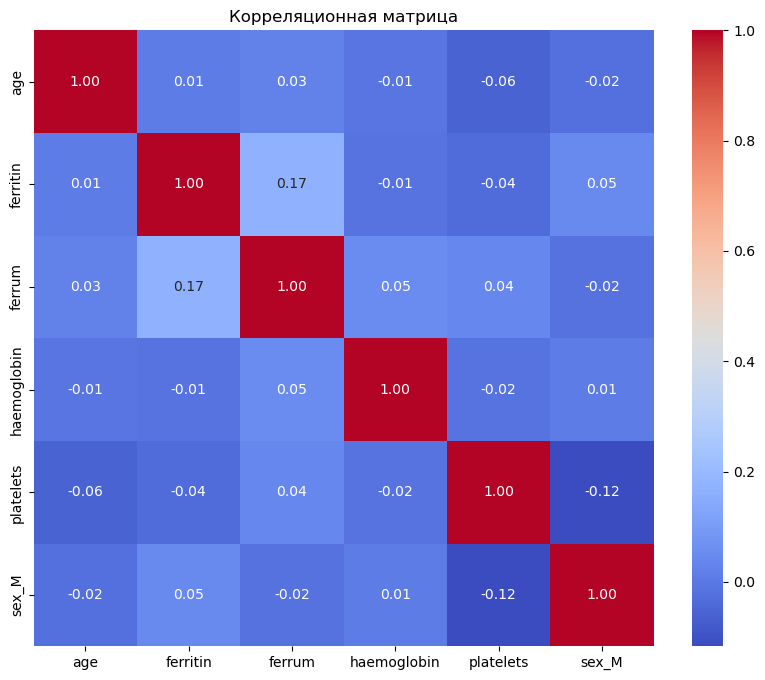

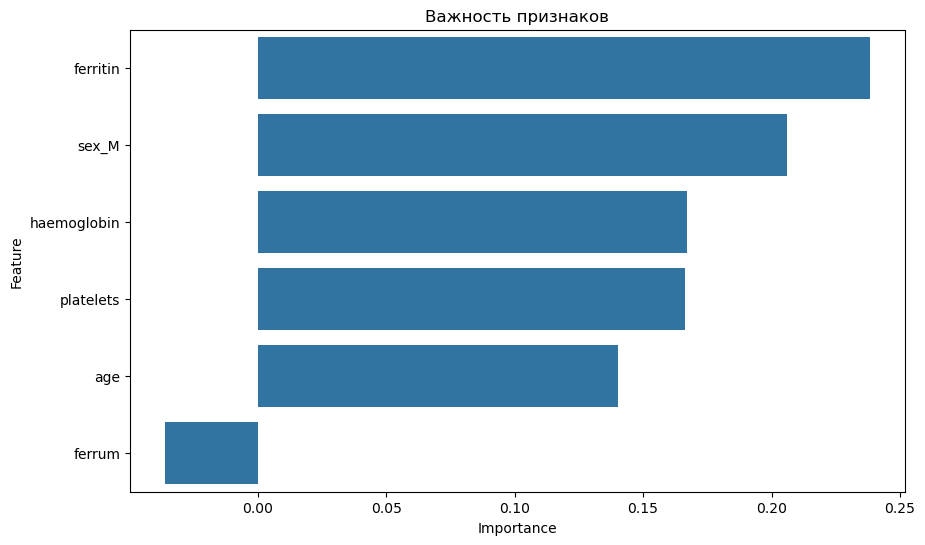

In [152]:
# Построение матрицы корреляций
correlation_matrix = X_transformed_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

# Анализ важности признаков
# Получение коэффициентов модели
logreg_model = pipeline.named_steps['classifier']
importance = logreg_model.coef_[0]

# Создание DataFrame для визуализации важности признаков
importance_df = pd.DataFrame({
    'Feature': columns_transformed,
    'Importance': importance
})

# Сортировка по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Важность признаков")
plt.show()

In [154]:
# Создание пайплайна с Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Обучение модели
pipeline_rf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = pipeline_rf.predict(X_test)

# Оценка модели
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43 52  5]
 [56 64  1]
 [ 5  9  1]]
              precision    recall  f1-score   support

         374       0.41      0.43      0.42       100
         375       0.51      0.53      0.52       121
         376       0.14      0.07      0.09        15

    accuracy                           0.46       236
   macro avg       0.36      0.34      0.34       236
weighted avg       0.45      0.46      0.45       236



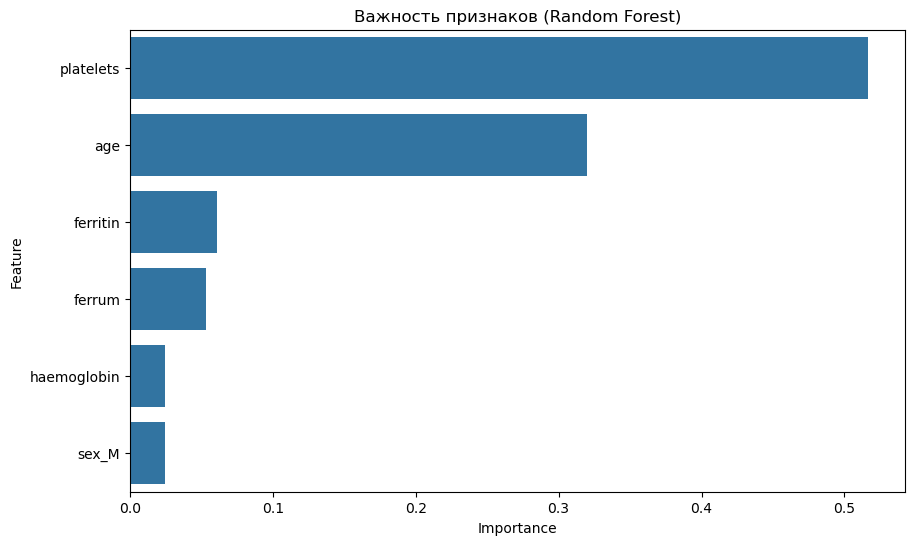

In [155]:
# Извлечение важности признаков
model = pipeline_rf.named_steps['classifier']
feature_importances = model.feature_importances_

# Получение имен выходных признаков
categorical_feature_names = pipeline_rf.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
columns_transformed = numerical_features + list(categorical_feature_names)

# Создание DataFrame для визуализации важности признаков
importance_df = pd.DataFrame({
    'Feature': columns_transformed,
    'Importance': feature_importances
})

# Сортировка по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Важность признаков (Random Forest)")
plt.show()